This notebook tests the neuron model implementations in neuron.py

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from neuron import RegularNeuron, PoissonNeuron
from plot_utils import rasterplot

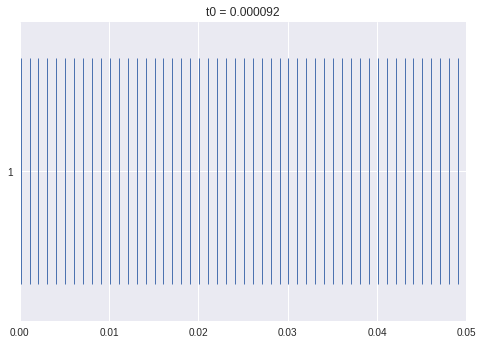

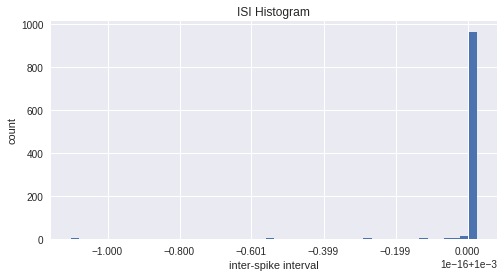

In [2]:
# test RegularNeuron
spike_rate = 1000.
neuron = RegularNeuron(spike_rate=spike_rate, weight=1)
spikes = neuron.generate_spikes(T=1.)
isi = np.diff(spikes.times)

ax = rasterplot(spikes)
ax.set_xlim(0, 0.05)
ax.set_title("t0 = %f"%spikes.times[0])

fig, ax = plt.subplots(nrows=1, figsize=(8,4))
ax.hist(isi, bins=50)
ax.set_xlabel('inter-spike interval')
ax.set_ylabel('count')
ax.set_title('ISI Histogram')
assert(np.allclose(isi, 1./spike_rate, atol=1e-12, rtol=0)) # check that isi are within 1e-12 of each other

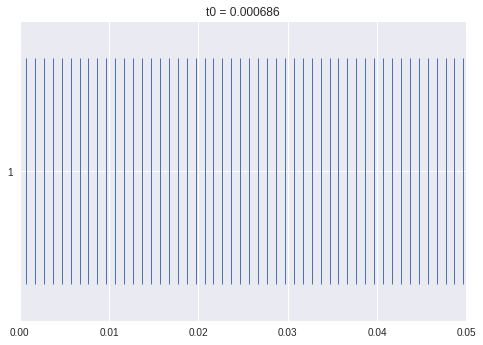

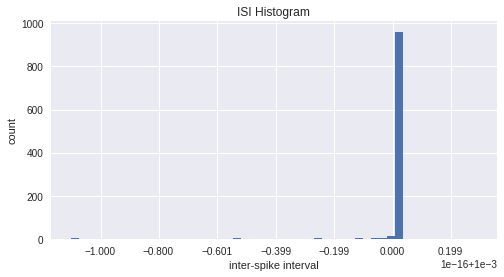

In [4]:
# test RegularNeuron
spike_rate = 1000.
neuron = RegularNeuron(spike_rate=spike_rate, weight=1)
spikes = neuron.generate_spikes(nspikes=1000)
isi = np.diff(spikes.times)

ax = rasterplot(spikes)
ax.set_xlim(0, 0.05)
ax.set_title("t0 = %f"%spikes.times[0])

fig, ax = plt.subplots(nrows=1, figsize=(8,4))
ax.hist(isi, bins=50)
ax.set_xlabel('inter-spike interval')
ax.set_ylabel('count')
ax.set_title('ISI Histogram')
assert(np.allclose(isi, 1./spike_rate, atol=1e-12, rtol=0)) # check that isi are within 1e-12 of each other

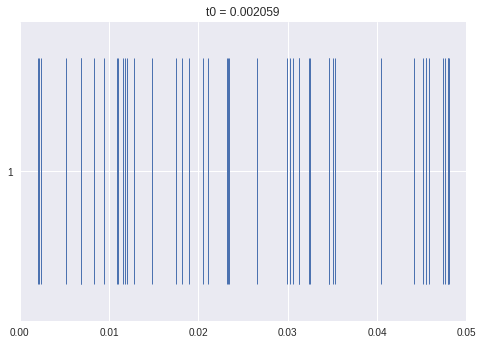

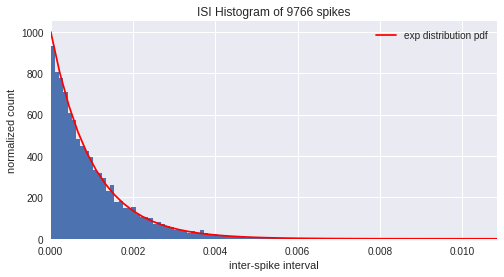

In [5]:
# test PoissonNeuron
spike_rate = 1000.
neuron = PoissonNeuron(spike_rate=spike_rate, weight=1)
spikes = neuron.generate_spikes(T=10.)
isi = np.diff(spikes.times)

ax = rasterplot(spikes)
ax.set_xlim(0, 0.05)
ax.set_title("t0 = %f"%spikes.times[0])

# histogram should match exponential distribution pdf pretty well
fig, ax = plt.subplots(nrows=1, figsize=(8,4))
ax.hist(isi, bins=100, normed=True)
tmin = 0
tmax = ax.get_xlim()[1]
t = np.linspace(tmin, tmax)
ax.plot(t, spike_rate * np.exp(-spike_rate * t), 'r', label="exp distribution pdf")
ax.set_xlim(tmin, tmax)
ax.set_xlabel('inter-spike interval')
ax.set_ylabel('normalized count')
ax.legend(loc="best")
ax.set_title('ISI Histogram of %d spikes'%len(spikes.times))

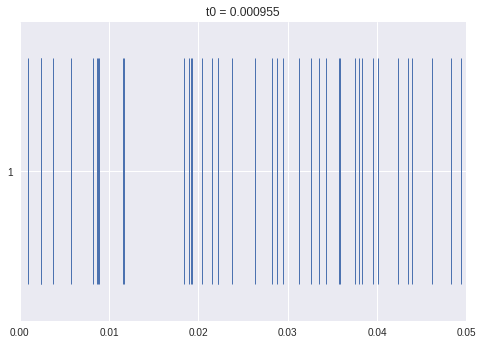

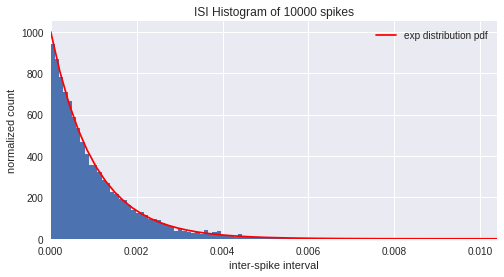

In [6]:
spike_rate = 1000.
neuron = PoissonNeuron(spike_rate=spike_rate, weight=1)
spikes = neuron.generate_spikes(nspikes=10000)
isi = np.diff(spikes.times)

ax = rasterplot(spikes)
ax.set_xlim(0, 0.05)
ax.set_title("t0 = %f"%spikes.times[0])

# histogram should match exponential distribution pdf pretty well
fig, ax = plt.subplots(nrows=1, figsize=(8,4))
ax.hist(isi, bins=100, normed=True)
tmin = 0
tmax = ax.get_xlim()[1]
t = np.linspace(tmin, tmax)
ax.plot(t, spike_rate * np.exp(-spike_rate * t), 'r', label="exp distribution pdf")
ax.set_xlim(tmin, tmax)
ax.set_xlabel('inter-spike interval')
ax.set_ylabel('normalized count')
ax.legend(loc="best")
ax.set_title('ISI Histogram of %d spikes'%len(spikes.times))